#**Import** **necessary** **packages**

In [48]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import random

random.seed(42)

In [50]:
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.9.2


#**Import dataset**

In [51]:
data = pd.read_excel('/content/new.xlsx')
data.shape

(335, 9)

In [52]:
dataset = data.sample(frac=1)
dataset
#dataset.to_excel('sample.xls')

,Ship_Type,Length,Breadth,Depth,Draft,LDT,GRT,NRT,BHP
94,Conaitner vessel,148.66,21.0,NaN,10.9,5428.3,9764.0,3716.0,7500.0
296,Bulk carrier,216.68,32.2,NaN,20.4,12962.0,40698.0,20133.0,7600.0
271,Bulk carrier,172.20,26.0,NaN,8.5,6141.0,18430.0,10685.0,10685.0
201,Conaitner vessel,245.00,32.0,NaN,10.1,14986.0,37549.0,20274.0,NaN
240,Conaitner vessel,163.38,27.5,NaN,5.0,6698.0,16270.0,9476.0,13125.0
...,...,...,...,...,...,...,...,...,...
167,Conaitner vessel,294.03,32.2,NaN,17.4,22144.0,53359.0,2961.0,34421.0
53,Conaitner vessel,182.07,28.4,NaN,15.6,8570.0,21034.0,11783.0,9000.0
163,Bulk carrier,215.43,32.2,5.0,5.0,11994.0,35119.0,20984.0,13500.0
108,Heavy Load carrier,123.40,24.4,NaN,5.0,5219.0,12124.0,3637.0,6265.0


#**Clean the dataset (CL)**

In [53]:
dataset = data[['Length','Breadth', 'Draft', 'LDT', 'GRT', 'NRT', 'BHP']].copy()
dataset

,Length,Breadth,Draft,LDT,GRT,NRT,BHP
0,298.38,50.00,6.00,25571.0,101466.0,63093.0,12022.0
1,178.96,25.30,5.00,10827.0,21142.0,11505.0,8058.0
2,247.05,41.60,17.21,18599.0,53383.0,32574.0,NaN
3,112.40,17.60,5.00,2764.0,4962.0,2972.0,4100.0
4,111.46,20.80,10.40,3595.0,7017.0,3371.0,5440.0
...,...,...,...,...,...,...,...
330,215.57,38.00,5.00,10222.0,38131.0,24124.0,9000.0
331,181.70,26.21,16.08,9058.0,22540.0,13020.0,12000.0
332,121.90,19.60,8.30,3581.0,5850.0,3011.0,3400.0
333,180.51,31.00,5.00,7472.0,23826.0,12793.0,8933.0


In [54]:
dataset.isnull().sum()

Length      0
Breadth     0
Draft       0
LDT         0
GRT         0
NRT         0
BHP        23
dtype: int64

In [55]:
dataset.dropna(inplace=True)

In [56]:
dataset.isnull().sum()

Length     0
Breadth    0
Draft      0
LDT        0
GRT        0
NRT        0
BHP        0
dtype: int64

#**Inspect the data**

W.r.t Length

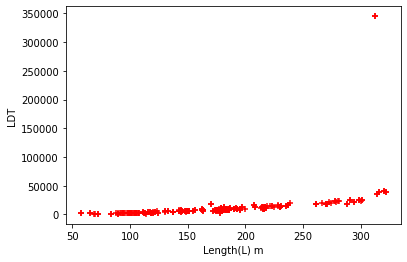

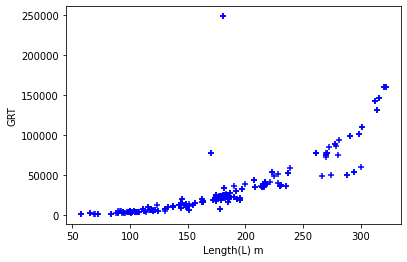

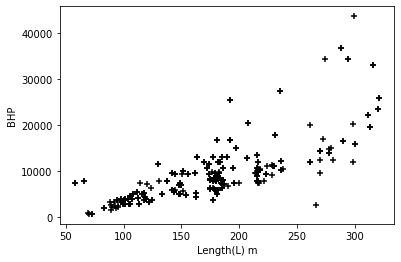

In [57]:
%matplotlib inline
plt.xlabel('Length(L) m')
plt.ylabel('LDT')
plt.scatter(dataset.Length, dataset.LDT,color='red',marker='+')
plt.show()

plt.xlabel('Length(L) m')
plt.ylabel('GRT')
plt.scatter(dataset.Length, dataset.GRT,color='blue',marker='+')
plt.show()

plt.xlabel('Length(L) m')
plt.ylabel('BHP')
plt.scatter(dataset.Length, dataset.BHP,color='black',marker='+')
plt.show()

W.r.t Breadth

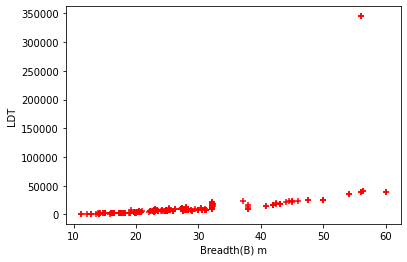

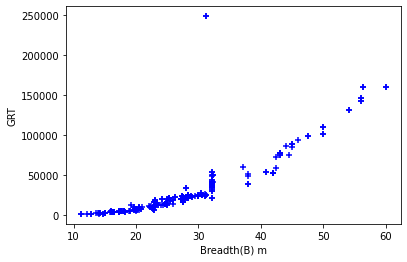

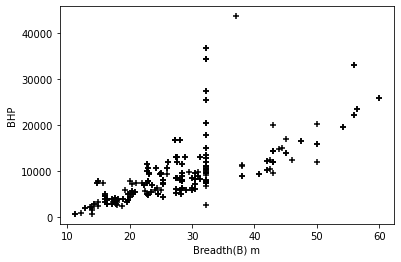

In [58]:
%matplotlib inline
plt.xlabel('Breadth(B) m')
plt.ylabel('LDT')
plt.scatter(dataset.Breadth, dataset.LDT,color='red',marker='+')
plt.show()

plt.xlabel('Breadth(B) m')
plt.ylabel('GRT')
plt.scatter(dataset.Breadth, dataset.GRT,color='blue',marker='+')
plt.show()

plt.xlabel('Breadth(B) m')
plt.ylabel('BHP')
plt.scatter(dataset.Breadth, dataset.BHP,color='black',marker='+')
plt.show()

W.r.t Depth

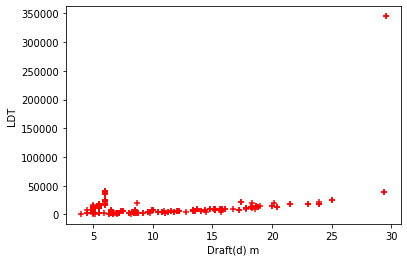

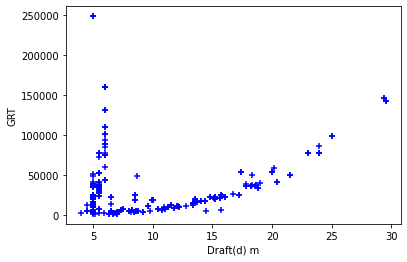

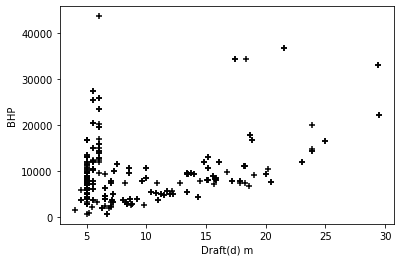

In [59]:
%matplotlib inline
plt.xlabel('Draft(d) m')
plt.ylabel('LDT')
plt.scatter(dataset.Draft, dataset.LDT,color='red',marker='+')
plt.show()

plt.xlabel('Draft(d) m')
plt.ylabel('GRT')
plt.scatter(dataset.Draft, dataset.GRT,color='blue',marker='+')
plt.show()

plt.xlabel('Draft(d) m')
plt.ylabel('BHP')
plt.scatter(dataset.Draft, dataset.BHP,color='black',marker='+')
plt.show()

#**Split the data into train and test**

In [60]:
train_dataset = dataset.sample(frac=0.9, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#**Split features from labels**

In [61]:
train_features = train_dataset.iloc[:,0:3]
train_labels = train_dataset.iloc[:,3:]

test_features = test_dataset.iloc[:,0:3]
test_labels = test_dataset.iloc[:,3:]

#**Normalization**

In [62]:
normalizer = preprocessing.Normalization(axis=1)
normalizer.adapt(np.array(train_features))

# PCA

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(train_features)

PCApca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

NameError: ignored

In [ ]:
principalDf

In [ ]:
finalDf = pd.concat([principalDf, test_labels], axis = 1)

In [ ]:
finalDf

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Linear Regression

In [ ]:
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

train_features, train_labels = make_regression(n_samples=1000, n_features=3, n_informative=5, n_targets=1, random_state=1, noise=0.5)
model = LinearRegression()
model.fit(train_features, train_labels)
yhat = model.predict(test_features)
print(yhat)

In [ ]:
test_labels

In [ ]:
test_predictions = model.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
limX = [0, 160000]
limY = [0, 35000]
plt.xlim(limX)
plt.ylim(limY)
_ = plt.plot(limX, limY)


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_labels, test_predictions)
coefficient_of_dermination

 # **Linear Model**

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

train_features, train_labels = make_regression(n_samples=1000, n_features=3, n_informative=5, n_targets=4, random_state=1, noise=0.5)
model_2 = KNeighborsRegressor()
model_2.fit(train_features, train_labels)
yhat = model_2.predict(test_features)
print(yhat)

In [ ]:
test_predictions = model_2.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
limX = [0, 160000]
limY = [0, 35000]
plt.xlim(limX)
plt.ylim(limY)
_ = plt.plot(limX, limY)


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_labels, yhat)
coefficient_of_dermination

In [ ]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

train_features, train_labels = make_regression(n_samples=1000, n_features=3, n_informative=5, n_targets=4, random_state=1, noise=0.5)
model_2 = KNeighborsRegressor()
model_2.fit(train_features, train_labels)
yhat = model_2.predict(test_features)
print(yhat)

# create datasets
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=1,
    callbacks=[PlotLossesKeras()],
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.9])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Linear']
loss_df.to_excel('Linear.xls')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Linear']
val_loss_df.to_excel('val_Linear.xls')

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

In [ ]:
pd.DataFrame(test_results, index=['RMSE']).T

#**Model 1**

In [64]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [65]:
def model_1(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(80, activation='relu'),

      layers.Dense(80, activation='relu'),

      layers.Dense(80, activation='relu'),

      layers.Dense(80, activation='relu'),
      layers.Dense(80, activation='relu'),
      layers.Dense(80, activation='relu'),
 
      layers.Dense(4)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [66]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_1 = model_1(normalizer)
dnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 3)                7         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 80)                320       
                                                                 
 dense_8 (Dense)             (None, 80)                6480      
                                                                 
 dense_9 (Dense)             (None, 80)                6480      
                                                                 
 dense_10 (Dense)            (None, 80)                6480      
                                                                 
 dense_11 (Dense)            (None, 80)                6480      
                                                      

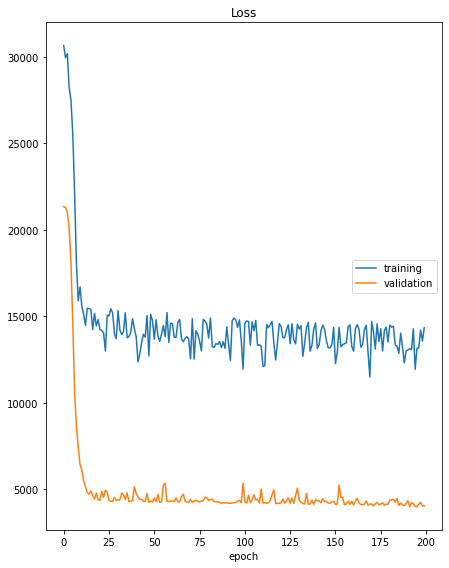

Loss
	training         	 (min: 11496.250, max: 30649.918, cur: 14342.979)
	validation       	 (min: 3996.837, max: 21338.404, cur: 4044.520)
9/9 [==============================] - 0s 42ms/step - loss: 14342.9795 - val_loss: 4044.5203
CPU times: user 1min 8s, sys: 21.3 s, total: 1min 30s
Wall time: 1min 12s


In [67]:
%%time
history = dnn_model_1.fit(
    train_features, train_labels,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=200, batch_size = 25)

In [68]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20000])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:

loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 1']
loss_df.to_excel('Model_1.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 1']
val_loss_df.to_excel('val_Model_1.xlsx')

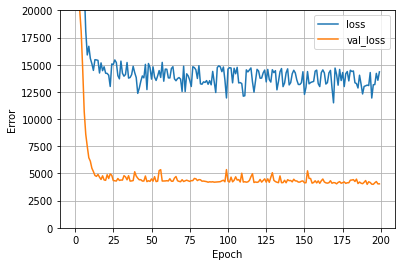

In [69]:
plot_loss(history)

Collect the results on the test set:

1/1 [==============================] - 0s 94ms/step


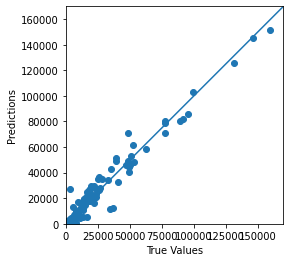

In [71]:
test_predictions = dnn_model_1.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 170000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [72]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_labels, test_predictions)
coefficient_of_dermination

0.74700891224418

In [73]:
dnn_model_1.save('dnn_model_1')

In [74]:
#reloaded = tf.keras.models.load_model('dnn_model_1')

test_results = {}

test_results['Model 1'] = dnn_model_1.evaluate(test_features, test_labels, verbose=1)

1/1 [==============================] - 0s 22ms/step - loss: 6153.0459


In [75]:
pd.DataFrame(test_results, index=['RMSE']).T

,RMSE
Model 1,6153.045898


#**Model 2**

In [ ]:
def model_2(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),

      layers.Dense(128, activation='relu'),

      layers.Dense(128, activation='relu'),

      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),

      layers.Dense(1)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [ ]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_2 = model_2(normalizer)
dnn_model_2.summary()

In [ ]:
%%time
history = dnn_model_2.fit(
    train_features, train_labels,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=400, batch_size = 25)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.4])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 2']
loss_df.to_excel('Model_2.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 2']
val_loss_df.to_excel('val_Model_2.xlsx')

In [ ]:
plot_loss(history)

In [ ]:
test_predictions = dnn_model_2.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [ ]:
dnn_model_2.save('dnn_model_2')

In [ ]:
# reloaded = tf.keras.models.load_model('dnn_model_2')


test_results['Model 2'] = dnn_model_2.evaluate(test_features, test_labels, verbose=1)

In [ ]:
pd.DataFrame(test_results, index=['RMSE']).T

# **Model 3**

In [ ]:
def model_3(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),

      layers.Dense(64, activation='relu'),

      layers.Dense(64, activation='relu'),

      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
 
      layers.Dense(1)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [ ]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_3 = model_3(normalizer)
dnn_model_3.summary()

In [ ]:
%%time
history = dnn_model_3.fit(
    train_features, train_labels,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=300, batch_size = 25)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.3])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 3']
loss_df.to_excel('Model_3.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 3']
val_loss_df.to_excel('val_Model_3.xlsx')

In [ ]:
plot_loss(history)

In [ ]:
test_predictions = dnn_model_3.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - Cl_test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [ ]:
dnn_model_3.save('dnn_model_3')

In [ ]:
#reloaded = tf.keras.models.load_model('dnn_model_3')


test_results['Model 3'] = dnn_model_3.evaluate(test_features, test_labels, verbose=1)

In [ ]:
pd.DataFrame(test_results, index=['RMSE']).T

#**Model 4**

In [ ]:
def model_4(norm):
  model = keras.Sequential([
      norm,


      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(1)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [ ]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_4 = model_4(normalizer)
dnn_model_4.summary()

In [ ]:
%%time
history = dnn_model_4.fit(
    train_features, train_labels,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=300, batch_size = 25)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.3])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 4']
loss_df.to_excel('Model_4.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 4']
val_loss_df.to_excel('val_Model_4.xlsx')

In [ ]:
plot_loss(history)

In [ ]:
test_predictions = dnn_model_4.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - Cl_test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [ ]:
dnn_model_4.save('dnn_model_4')

In [ ]:
#reloaded = tf.keras.models.load_model('dnn_model_4')


test_results['Model 4'] = dnn_model_4.evaluate(test_features, test_labels, verbose=1)

In [ ]:
pd.DataFrame(test_results, index=['RMSE']).T

#**Model 5**

In [ ]:
def model_5(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),

      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      # layers.Dense(128, activation='relu'),

      layers.Dense(1)])

  # model.compile(loss='mean_squared_error',
  #               optimizer=tf.keras.optimizers.Adam(0.001))
  
  model.compile(optimizer = "rmsprop", loss = root_mean_squared_error)
  return model

In [ ]:
#dnn_model = build_and_compile_model(normalizer)

dnn_model_5 = model_5(normalizer)
dnn_model_5.summary()

In [ ]:
%%time
history = dnn_model_5.fit(
    train_features, train_labels,
    validation_split=0.2,
    callbacks=[PlotLossesKeras()],
    verbose=1, epochs=300, batch_size = 25)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.3])
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend()
  plt.grid(True)

In [ ]:
loss_df = pd.DataFrame(history.history["loss"])
loss_df.columns =['Model 5']
loss_df.to_excel('Model_5.xlsx')

In [ ]:
val_loss_df = pd.DataFrame(history.history["val_loss"])
val_loss_df.columns =['Model 5']
val_loss_df.to_excel('val_Model_5.xlsx')

In [ ]:
plot_loss(history)

In [ ]:
test_predictions = dnn_model_5.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [ ]:
# error = test_predictions - Cl_test_labels
# plt.hist(error, bins=25)
# plt.xlabel('Prediction Error')
# _ = plt.ylabel('Count')

In [ ]:
dnn_model_5.save('dnn_model_5')

In [ ]:
#reloaded = tf.keras.models.load_model('dnn_model_5')


test_results['Model 5'] = dnn_model_5.evaluate(test_features, test_labels, verbose=1)

In [ ]:
pd.DataFrame(test_results, index=['RMSE']).T

#**Loss DataFrame**

In [ ]:
d1 = pd.read_excel('/content/Model_1.xlsx', index_col = 0)
d2 = pd.read_excel('/content/Model_2.xlsx', index_col = 0)
d3 = pd.read_excel('/content/Model_3.xlsx', index_col = 0)
d4 = pd.read_excel('/content/Model_4.xlsx', index_col = 0)
d5 = pd.read_excel('/content/Model_5.xlsx', index_col = 0)

In [ ]:
l = pd.concat([d1, d2, d3, d4, d5],axis=1)

In [ ]:
l.to_excel("loss.xls")

In [ ]:
d1 = pd.read_excel('/content/val_Model_1.xlsx', index_col = 0)
d2 = pd.read_excel('/content/val_Model_2.xlsx', index_col = 0)
d3 = pd.read_excel('/content/val_Model_3.xlsx', index_col = 0)
d4 = pd.read_excel('/content/val_Model_4.xlsx', index_col = 0)
d5 = pd.read_excel('/content/val_Model_5.xlsx', index_col = 0)

In [ ]:
l = pd.concat([d1, d2, d3, d4, d5],axis=1)

In [ ]:
l.to_excel("val_loss.xls")

# Validation

In [ ]:
exp = pd.read_excel('/content/pca_16k.xlsx')
exp.head(42)

In [ ]:
#test_predictions = dnn_model_1.predict(exp.iloc[:,0:2]).flatten()
test_predictions = dnn_model_5.predict(exp.iloc[:,0:4])
test_predictions
a = plt.axes(aspect='equal')
plt.scatter(exp.iloc[:,4], test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0.08, 1.1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
dnn_model_5.evaluate(exp.iloc[:,0:4], exp.iloc[:,4], verbose=1)

In [ ]:
predcl = pd.DataFrame(test_predictions)
predcl.head()
adding = exp.iloc[:,0:4]
adding

In [ ]:
adding['pred_cl'] = predcl.iloc[:,0:3].values

In [ ]:
adding.head(16)

In [ ]:
# adding['abs_cl'] = adding.apply(
#     lambda row: abs(row.actual_cl - row.pred_cl), axis=1)

In [ ]:
# adding['abs_cd'] = adding.apply(
#     lambda row: abs(row.CD - row.pred_cd), axis=1)

In [ ]:
# adding_sorted_cl= adding.sort_values(['abs_cl'])

In [ ]:
#adding_sorted_cl.drop(['pred_cd', 'abs_cl','abs_cd'], axis=1, inplace=True)
# adding_sorted_cl

In [ ]:
# adding_sorted_cd= adding.sort_values(['abs_cd'])
# adding_sorted_cd.head(20)

In [ ]:
adding.to_excel('ml_cl_model2.xls')

NACA - 0012

In [ ]:
plt.scatter(adding.iloc[0:16,2], adding.iloc[0:16,3])
plt.scatter(adding.iloc[0:16,2], adding.iloc[0:16,4])

NACA - 0015

In [ ]:
plt.scatter(adding.iloc[17:32,2], adding.iloc[17:32,3])
plt.scatter(adding.iloc[17:32,2], adding.iloc[17:32,4])

NACA - 0018

In [ ]:
plt.scatter(adding.iloc[33:49,2], adding.iloc[33:49,3])
plt.scatter(adding.iloc[33:49,2], adding.iloc[33:49,4])